# Data Storytelling: A Brief Tutorial Using the Global Data Barometer 2025 🌍

Working with data is a lot like **baking a cake**. You start with raw ingredients — messy, unstructured information that needs to be carefully gathered, just like flour, eggs, and sugar waiting to be mixed. The next step is cleaning and preparing the data, which is where data analysis begins — just as you'd sift flour, crack eggs, and bake the batter into layers, you organize, explore, and begin making sense of the data. Then comes the magic: data visualization and storytelling. Like frosting and decorating a cake, this stage transforms your hard work into something beautiful, digestible, and impactful. And finally, just as a well-made cake is enjoyed and leaves behind only crumbs, your data story gets consumed — leading to decisions, action, and hopefully, a lasting impression.

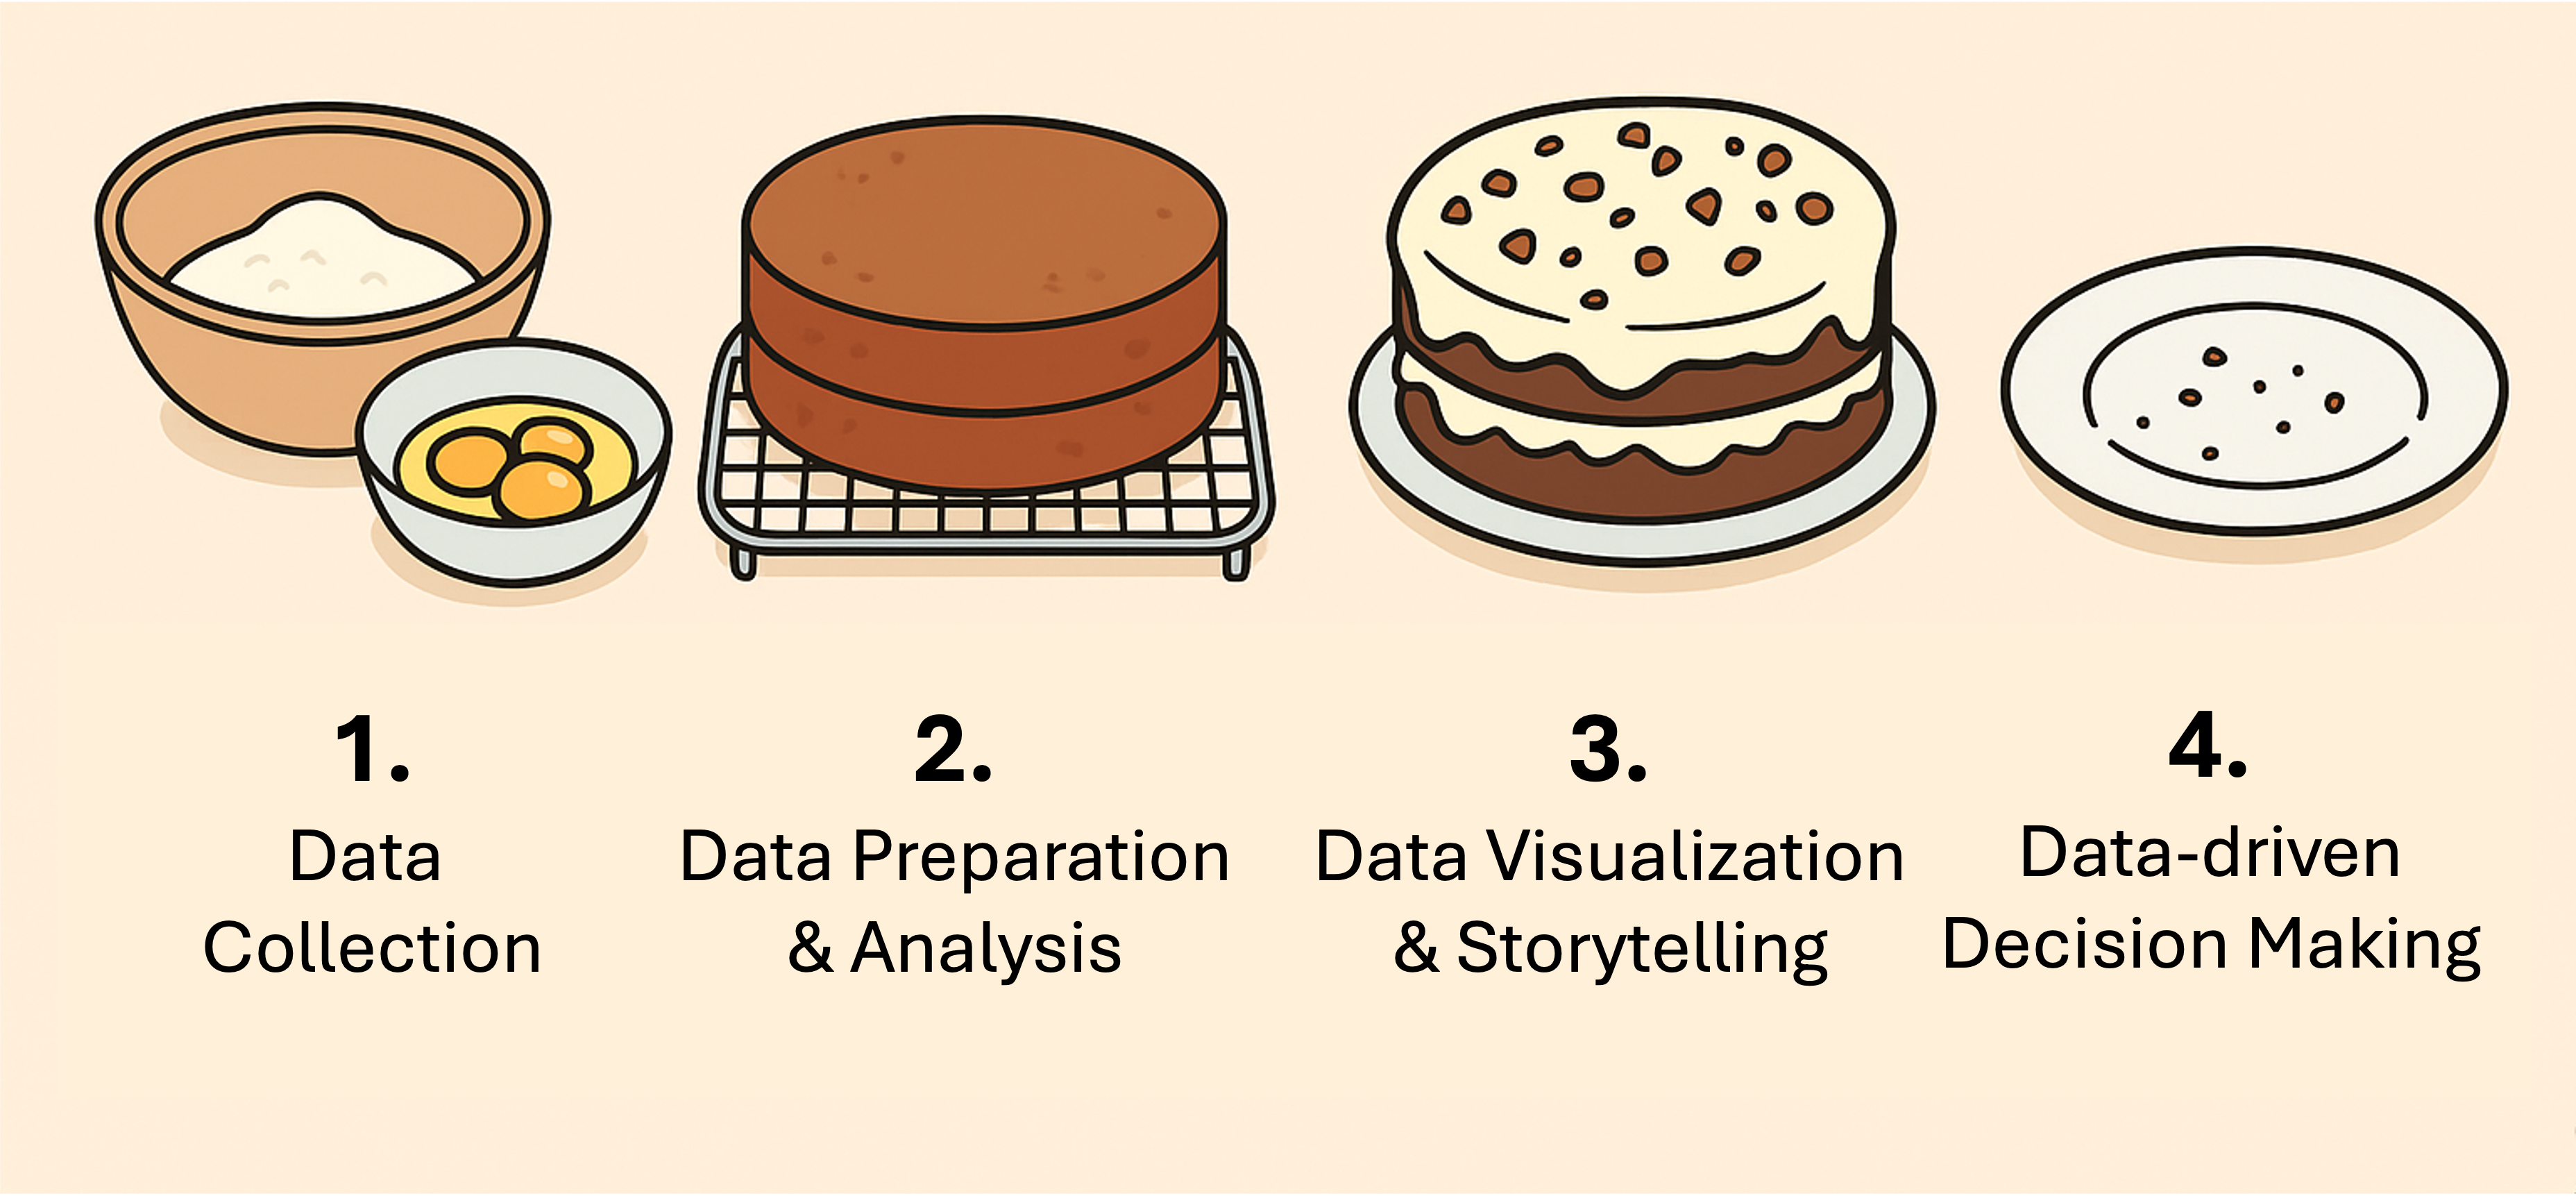

This notebook offers a brief introduction to key principles of data storytelling — a critical stage that can make or break your **data cake**. No matter how much effort you’ve invested in collecting, cleaning, and analyzing data, it’s all for nothing if you can’t clearly and compellingly communicate your insights.



To develop this ideas, we will use the **[2nd Edition of the Global Data Barometer (GDB)](https://globaldatabarometer.org/)** — an innovative assessment tool that measures how effectively countries are cultivating their data ecosystems. One of the most valuable aspects of the GDB is that it provides its data in an [open format](https://globaldatabarometer.org/open-data/), enabling broad access and reuse. Using this dataset, we will explore governance, capabilities, and data availability across 43 countries in **Africa** and **Latin America & the Caribbean**.



What you’re reading is a Jupyter Notebook — an open-source web application that enables users to create and share documents containing live code (in our case, Python 🐍), equations, visualizations, and narrative text.

## 🧭 Learning Goals
- Understand the structure and insights of the Global Data Barometer 2025.
- Create data visualizations in Python using `pandas`, `matplotlib`, and `seaborn`.
- Build a compelling narrative using evidence from the GDB report.

## 📦 Step 1: Load the Dataset

In [12]:
import pandas as pd
# Load the CSV file directly from the GDB
url = "https://storage.googleapis.com/gdb-2024-analysis/open_data_2nd_edition/gdb-2024-full-data.csv"
df = pd.read_csv(url)
# Displays the first 5 rows
df

iso3       country      pillar                cluster      action_area  \
0      AGO        Angola  Governance  Governance Foundation  Data Protection   
1      AGO        Angola  Governance  Governance Foundation  Data Protection   
2      AGO        Angola  Governance  Governance Foundation  Data Protection   
3      AGO        Angola  Governance  Governance Foundation  Data Protection   
4      AGO        Angola  Governance  Governance Foundation  Data Protection   
...    ...           ...         ...                    ...              ...   
38384  ZAF  South Africa         NaN        Land Management              NaN   
38385  ZAF  South Africa         NaN    Political Integrity              NaN   
38386  ZAF  South Africa         NaN         Public Finance              NaN   
38387  ZAF  South Africa         NaN     Public Procurement              NaN   
38388  ZAF  South Africa         NaN                    NaN              NaN   

           indicator_id                   indicator_name indicator_type  \
0      G.GOVERNANCE.DPL  Governance (G): Data protection        Primary   
1      G.GOVERNANCE.DPL  Governance (G): Data protection        Primary   
2      G.GOVERNANCE.DPL  Governance (G): Data protection        Primary   
3      G.GOVERNANCE.DPL  Governance (G): Data protection        Primary   
4      G.GOVERNANCE.DPL  Governance (G): Data protection        Primary   
...                 ...                              ...            ...   
38384               NaN                              NaN        Cluster   
38385               NaN                              NaN        Cluster   
38386               NaN                              NaN        Cluster   
38387               NaN                              NaN        Cluster   
38388               NaN                              NaN      GDB score   

                     variable_name        question_type  ... weight  score  \
0                 G.GOVERNANCE.DPL        main question  ...    NaN  75.33   
1               G.GOVERNANCE.DPL.a              section  ...    1.0   1.00   
2               G.GOVERNANCE.DPL.a            sub-group  ...    1.0   1.00   
3        G.GOVERNANCE.DPL.a.EXISTS         sub-question  ...    NaN    NaN   
4      G.GOVERNANCE.DPL.a.EXISTS.2  supporting question  ...    NaN    NaN   
...                            ...                  ...  ...    ...    ...   
38384                          NaN                  NaN  ...    NaN  55.95   
38385                          NaN                  NaN  ...    NaN  30.56   
38386                          NaN                  NaN  ...    NaN  90.18   
38387                          NaN                  NaN  ...    NaN  87.76   
38388                          NaN                  NaN  ...    NaN  47.79   

                          parent question_order     wib  wiaa     wic  \
0               G.GOVERNANCE.DPL        50948.0  0.0334   1.0  0.1843   
1               G.GOVERNANCE.DPL        50949.0  0.0334   1.0  0.1843   
2             G.GOVERNANCE.DPL.a        50950.0  0.0334   1.0  0.1843   
3             G.GOVERNANCE.DPL.a        50951.0  0.0334   1.0  0.1843   
4      G.GOVERNANCE.DPL.a.EXISTS        50951.0  0.0334   1.0  0.1843   
...                          ...            ...     ...   ...     ...   
38384                        NaN            NaN     NaN   NaN     NaN   
38385                        NaN            NaN     NaN   NaN     NaN   
38386                        NaN            NaN     NaN   NaN     NaN   
38387                        NaN            NaN     NaN   NaN     NaN   
38388                        NaN            NaN     NaN   NaN     NaN   

        regional_hub        un_region  barometer_region  
0      LDRI (Africa)    Middle Africa            Africa  
1      LDRI (Africa)    Middle Africa            Africa  
2      LDRI (Africa)    Middle Africa            Africa  
3      LDRI (Africa)    Middle Africa            Africa  
4      LDRI (Africa)    Middle Africa   

## 🧮 Step 2: Understand Context and Data
At the core of the Barometer’s methodology are 27 primary indicators, derived from an expert survey, and 11 secondary indicators sourced from recognized international datasets. Each primary indicator includes a series of sub-questions that contribute to weighted scores on a 0–100 scale, along with supporting questions that help generate qualitative insights. All indicators are grouped under three main pillars — Governance, Capabilities, and Availability — and can also be organized into action areas (spotlight topics of interest) and clusters (collections of related action areas).



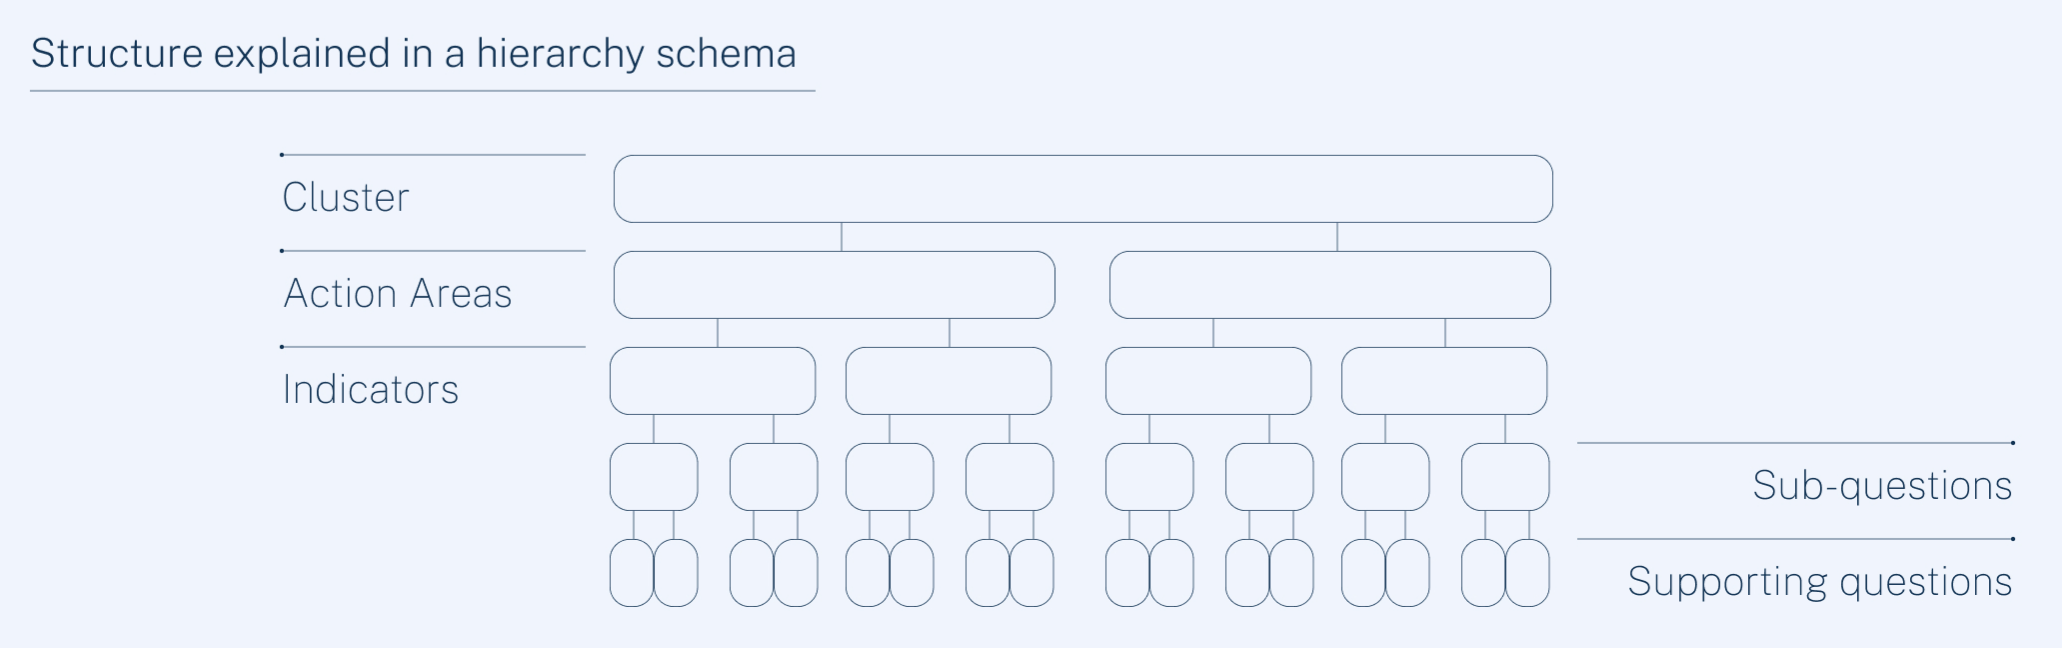

Source: [2025 GDB REPORT SECOND EDITION](https://globaldatabarometer.org/wp-content/uploads/2025/06/GDB25_English.pdf)

Following this structure, the dataset provides results for each country across multiple levels of hierarchy:

* Level 0: High-level scores, including national scores, cluster scores, and action area scores.

* Level 1: Indicator-level scores, expressed on a 0–100 scale.

* Level 2: Multiplier values and element-level scores that contribute to the overall indicator score.

* Level 3: Sub-groups within each indicator section, offering additional granularity.

* Level 4: Sub-questions and supporting questions that provide detailed evidence and context.

In [7]:
# Quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38389 entries, 0 to 38388
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso3                       38389 non-null  object 
 1   country                    38389 non-null  object 
 2   pillar                     37185 non-null  object 
 3   cluster                    38346 non-null  object 
 4   action_area                38002 non-null  object 
 5   indicator_id               37185 non-null  object 
 6   indicator_name             37185 non-null  object 
 7   indicator_type             38389 non-null  object 
 8   variable_name              37185 non-null  object 
 9   question_type              36669 non-null  object 
 10  question_text              36669 non-null  object 
 11  hierarchy_level            38389 non-null  int64  
 12  data_type                  38389 non-null  object 
 13  response                   27654 non-null  obj

## 📈 Step 3: Choose an Effective Visual

Choosing the right type of visual is key for effectively communicating your message. Bar charts, line plots, heatmaps, and maps each serve different purposes. Your choice should align with the structure of your data and the story you want to tell — for example, trends over time are better shown with line plots, while comparisons across categories may benefit from bar charts or grouped visuals.

In [11]:
import plotly.express as px

# Country-level average scores
country_avg = df[df["indicator_type"] == "GDB score"][["country", "score"]].dropna()

# Create choropleth map
fig = px.choropleth(country_avg,
                    locations='country',
                    locationmode='country names',
                    color='score',
                    color_continuous_scale='Plasma',
                    range_color=[0, 100],
                    title='Average GDB Score in Latin America and Africa')

# Adjust map to focus only on Latin America and Africa (with full Mexico)
fig.update_geos(
    visible=False,
    resolution=110,
    showcountries=True,
    lataxis_range=[-55, 35],
    lonaxis_range=[-120, 60]
)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

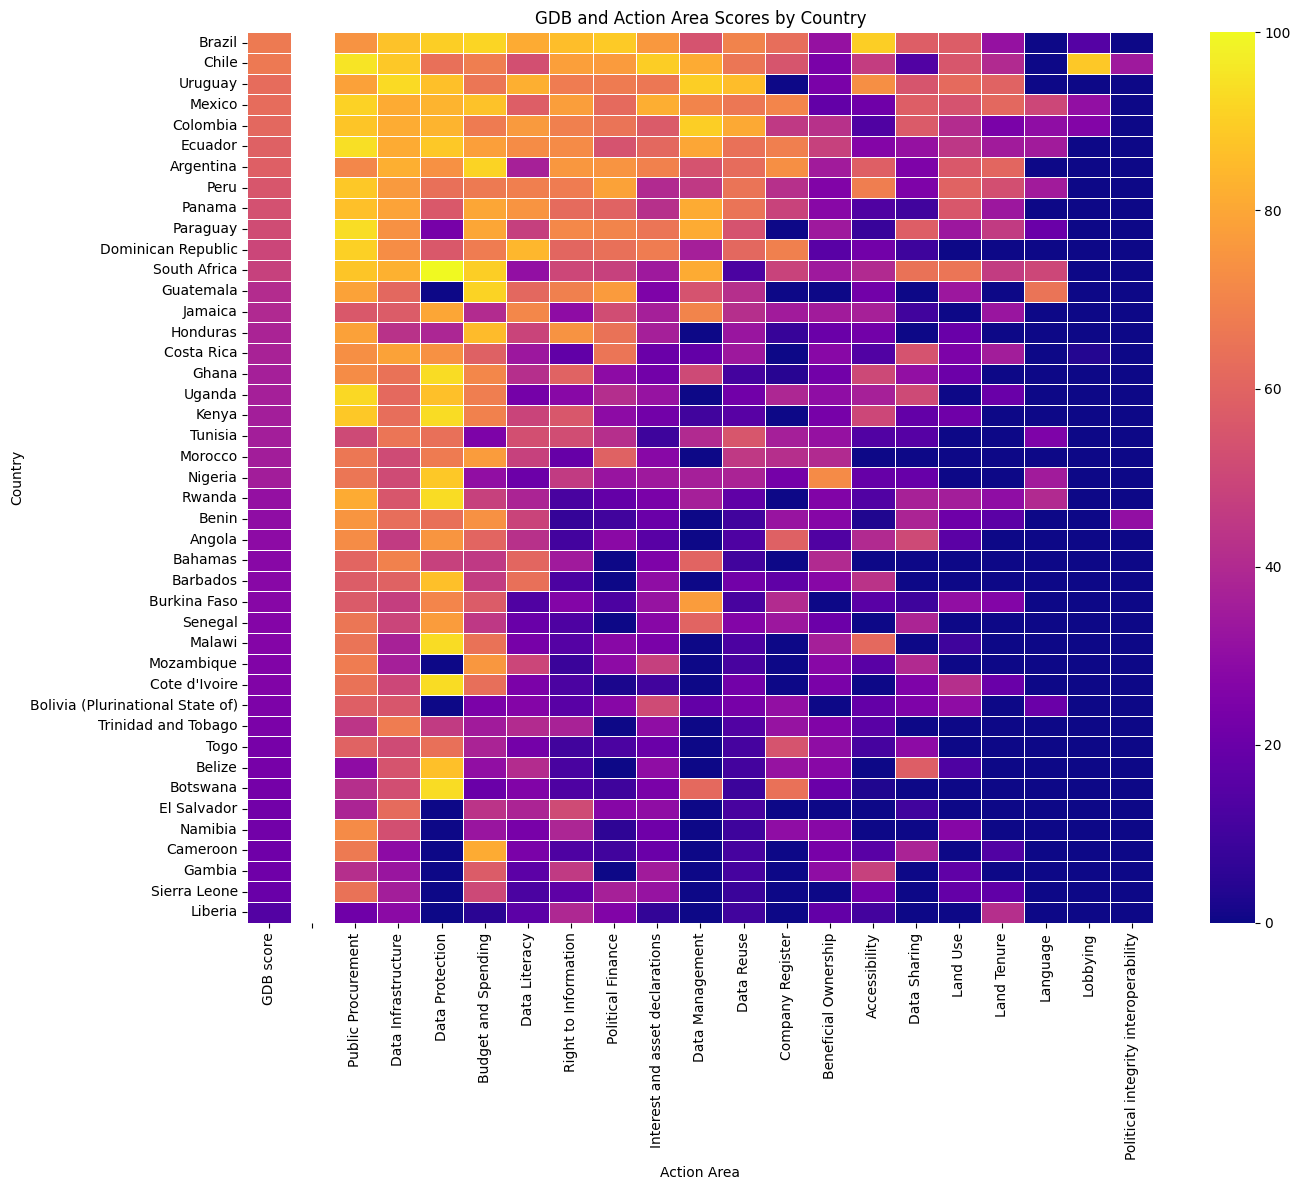

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

# Filter for GDB scores
gdb_scores = df[df["indicator_type"] == "GDB score"][["country", "score"]].dropna()
gdb_scores = gdb_scores.set_index("country").rename(columns={"score": "GDB score"})

# Filter for action area scores and create pivot table
action_area_scores = df[df["indicator_type"] == "Action Area"]
pivot_table = action_area_scores.pivot_table(index="country", columns="action_area", values="score")

# Order action areas by average value
action_area_order = pivot_table.mean().sort_values(ascending=False).index
pivot_table = pivot_table[action_area_order]

# Combine GDB score with action area scores
full_table = gdb_scores.join(pivot_table)

# Sort countries by GDB score descending
full_table_sorted = full_table.sort_values(by="GDB score", ascending=False)

# Insert a spacer column
full_table_with_space = full_table_sorted.copy()
full_table_with_space.insert(1, " ", float("nan"))

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(full_table_with_space, cmap="plasma", annot=False, linewidths=0.5)
plt.title("GDB and Action Area Scores by Country")
plt.xlabel("Action Area")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 🔍 Step 4: Focus Attention

Storytelling with data often implies guiding the viewer’s eye to what matters most. This can be achieved through visual cues like color, size, annotations, or highlighting key data points

/tmp/ipython-input-24-1326878137.py:40: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

/tmp/ipython-input-24-1326878137.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




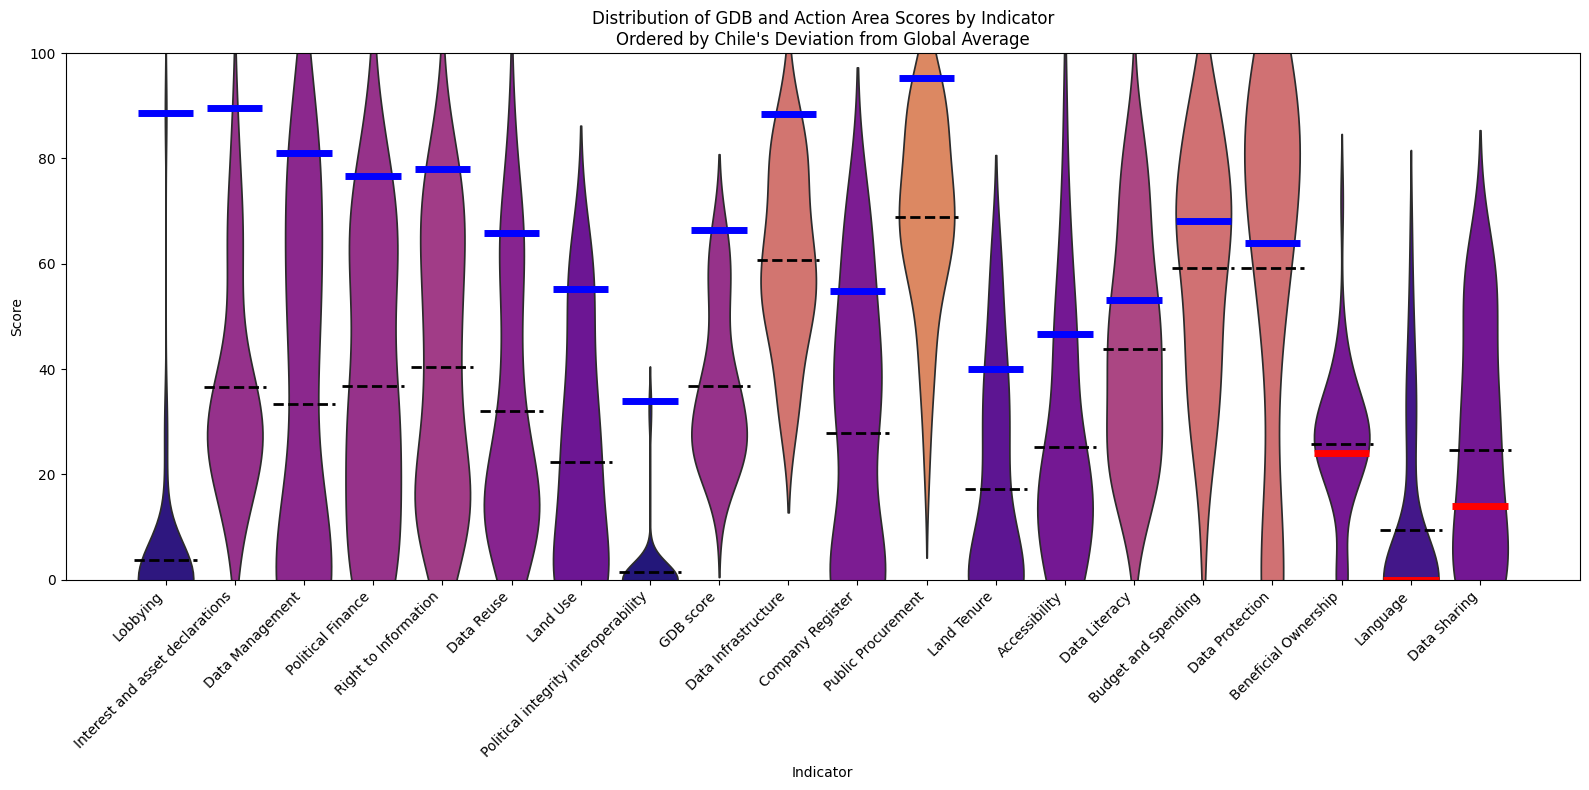

In [24]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# GDB scores
gdb_scores = df[df["indicator_type"] == "GDB score"][["country", "score"]].dropna()
gdb_scores = gdb_scores.set_index("country").rename(columns={"score": "GDB score"})

# Action Area scores
action_area_scores = df[df["indicator_type"] == "Action Area"]
pivot_table = action_area_scores.pivot_table(index="country", columns="action_area", values="score")
action_area_order = pivot_table.mean().sort_values(ascending=False).index
pivot_table = pivot_table[action_area_order]

# Combine and sort data
full_table = gdb_scores.join(pivot_table)
columns_order = ["GDB score"] + list(action_area_order)
full_table_sorted = full_table.sort_values(by="GDB score", ascending=False)

# Melt for plotting
long_df = full_table_sorted[columns_order].reset_index().melt(
    id_vars="country", var_name="Indicator", value_name="Score"
).dropna()

# Indicator averages
indicator_means = long_df.groupby("Indicator")["Score"].mean().reindex(columns_order)

# Chile scores
chile_data = long_df[long_df["country"] == "Chile"]
chile_scores = chile_data.groupby("Indicator")["Score"].first().reindex(columns_order)

# Difference between Chile and global average
differences = chile_scores - indicator_means
sorted_indicators = differences.sort_values(ascending=False).index.tolist()

# Color mapping using Plasma
norm = mcolors.Normalize(vmin=0, vmax=100)
plasma = cm.get_cmap("plasma")
colors_sorted = [plasma(norm(indicator_means[ind])) for ind in sorted_indicators]

# Plot
plt.figure(figsize=(16, 8))
sns.violinplot(
    data=long_df,
    x="Indicator",
    y="Score",
    order=sorted_indicators,
    palette=colors_sorted,
    inner=None
)

# Draw lines: black (mean), red/blue (Chile)
for i, indicator in enumerate(sorted_indicators):
    mean = indicator_means[indicator]
    chile_score = chile_scores[indicator]

    # Global average line
    plt.hlines(y=mean, xmin=i - 0.45, xmax=i + 0.45, color="black", linewidth=2, linestyle='--')

    # Chile score line
    if pd.notna(chile_score):
        color = "blue" if chile_score >= mean else "red"
        plt.hlines(y=chile_score, xmin=i - 0.4, xmax=i + 0.4, color=color, linewidth=5)

# Final touches
plt.title("Distribution of GDB and Action Area Scores by Indicator\nOrdered by Chile's Deviation from Global Average")
plt.xlabel("Indicator")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# 🎭 Step 3: Tell a Story

Data becomes meaningful when framed within a narrative. A compelling story structure typically includes a beginning (context), middle (conflict or insight), and end (resolution or action).

# 🤔 Final thoughts

Storytelling with data is both an art and a skill. Beyond choosing the right visuals, it’s about clarity, empathy, and purpose.

# Useful resources



*   [Storytelling with Data](https://www.storytellingwithdata.com/) by Cole Nussbaumer Knaflic is a modern classic that clearly illustrates a step-by-step approach to crafting compelling narratives through data-driven visuals.
*   [Resonate](https://www.resonatebook.com/) by Nancy Duarte is an excellent guide to storytelling, offering powerful ideas that apply to both data-driven and non-data narratives. The best thing is that you can read it for free 😉.

